In [3]:
!pip install xgboost openpyxl

from google.colab import files
files.upload()  # Select kaggle.json when prompted


Saving kaggle.json to kaggle (1).json


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud

!unzip creditcardfraud.zip

import pandas as pd
data = pd.read_csv("creditcard.csv")
data.head()


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.15GB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file
data = pd.read_csv("creditcard.csv")

# Preview first 5 rows
data.head()

# Check for null values
print(data.isnull().sum())

# Drop rows with NaN values in the 'Class' column
data.dropna(subset=['Class'], inplace=True)

# 'Class' column is target (0 = normal, 1 = fraud)
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [10]:
# Check NaNs in target
print("Missing values in target:", y.isnull().sum())

# Combine features and target temporarily
data_clean = data.dropna(subset=['Class'])  # Remove rows where target is NaN

# Split features and target again
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced'
)
rf_model.fit(X_train_scaled, y_train)


Missing values in target: 1


RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create XGBoost model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=sum(y_train==0)/sum(y_train==1)  # Handle class imbalance
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

import pandas as pd

# Convert X_test_scaled back to DataFrame
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Add actual and predicted labels
X_test_df['Actual'] = y_test.values
X_test_df['Predicted'] = y_pred_xgb

# Filter only predicted fraud transactions
fraud_alerts = X_test_df[X_test_df['Predicted'] == 1]

# Save fraud alerts to CSV for Power BI dashboard
fraud_alerts.to_csv("fraud_alerts.csv", index=False)

# Preview
fraud_alerts.head()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:49:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3992
         1.0       0.61      0.85      0.71        13

    accuracy                           1.00      4005
   macro avg       0.81      0.92      0.85      4005
weighted avg       1.00      1.00      1.00      4005



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Actual,Predicted
376,1.007050,-9.308081,7.037948,-12.090129,3.957183,-9.248744,-3.485161,-11.437262,9.041085,-3.628229,...,-1.778425,-1.315531,0.150684,2.413453,-0.513025,3.864466,2.204172,-0.341196,0.0,1
379,0.460853,-8.187621,5.548873,-13.250236,7.907248,-6.243237,-1.865751,-12.480633,0.692434,-5.407222,...,1.869038,2.316174,-1.794390,-0.535732,1.176919,5.320646,-5.792035,-0.341196,1.0,1
731,-0.764159,0.777002,1.807609,-2.841987,3.041034,2.650437,-1.089136,1.413875,-0.389038,-1.490721,...,-0.876838,-1.220372,-2.794967,3.127420,1.005996,-0.050168,0.567492,-0.341196,1.0,1
1001,0.237013,-6.297721,2.349932,-7.434067,6.394891,-1.791421,-3.419299,-16.557970,0.222661,-3.944710,...,-2.138818,-37.905421,0.902641,-11.248259,-0.077497,7.612490,-3.193494,5.676728,1.0,1
1055,-0.274514,0.732208,0.441285,0.171603,2.468155,0.113709,-0.196307,0.125318,-0.099929,-0.454116,...,-0.499126,0.166271,0.460556,0.569866,-0.247489,-0.119475,0.053196,-0.333586,0.0,1


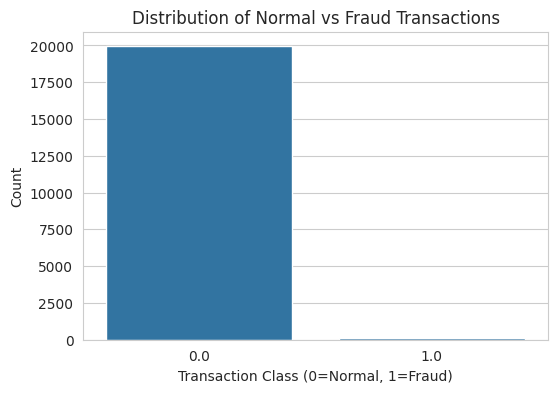

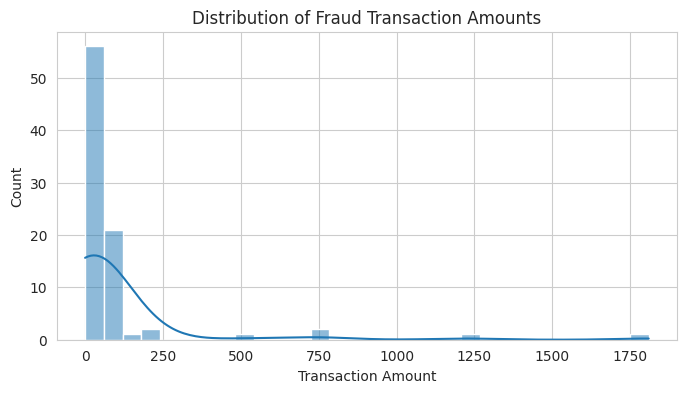

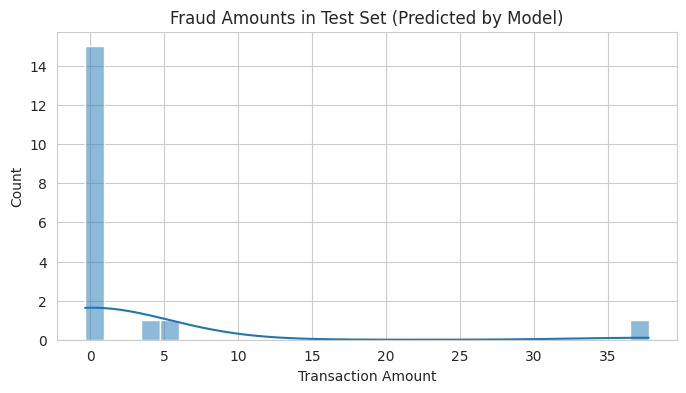

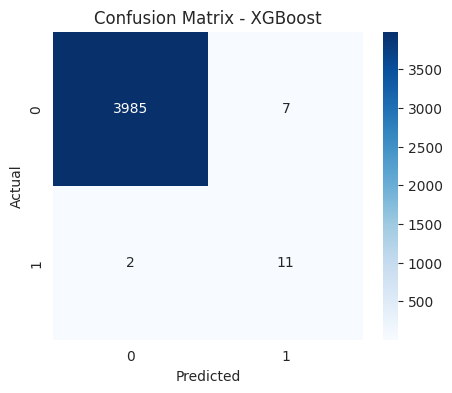

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Distribution of Normal vs Fraud Transactions")
plt.xlabel("Transaction Class (0=Normal, 1=Fraud)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data[data['Class']==1]['Amount'], bins=30, kde=True)
plt.title("Distribution of Fraud Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(fraud_alerts['Amount'], bins=30, kde=True)
plt.title("Fraud Amounts in Test Set (Predicted by Model)")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

from sklearn.metrics import confusion_matrix
import numpy as np

# XGBoost predictions
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()
